In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import time
from qwikidata.sparql import (get_subclasses_of_item,
                              return_sparql_query_results)

# An analysis of ethnic groups using the Wikidata categorisation

In [6]:
FILENAME = '../data/open-plaques-subjects-united-kingdom.csv'
df = pd.read_csv(FILENAME)

Do a quick analysis of the gender proportions

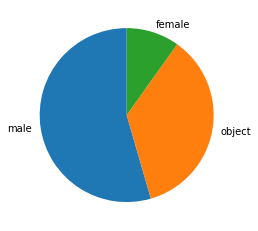

In [7]:
gender = {}
for index, row in df.iterrows():
    try:
        gender[row['sex']] += 1
    except:
        gender[row['sex']] = 1

# Display as a pie chart
plt.pie(gender.values(), labels = gender.keys(), startangle = 90)
plt.show()

In [19]:
FILENAME = '../data/open-plaques-subjects-sample.csv'
df = pd.read_csv(FILENAME)

Remove the rows which don't have wikidata id's attached

In [20]:
df.dropna(subset = ['wikidata_id'], inplace = True)

In [21]:
# Store the results in a list
results = []
print('Total wikidata examples {0}'.format(df.shape[0]))

# Iterate through the wiki IDs
for i, row in df.iterrows():
    
    # Waiting will mean more of the queries come back with results
    time.sleep(1)
    
    ethnicity = 'wdt:P172'
    sparql_query = """
    SELECT ?item ?itemLabel 
    WHERE 
    {
      wd:""" + row['wikidata_id'] + " " + ethnicity + """ ?item.
      SERVICE wikibase:label {bd:serviceParam wikibase:language "en" . }
    }
    """
    
    # Use a try to avoid errors where the property field for citizenship isn't present e.g. objects
    try:
        res = return_sparql_query_results(sparql_query)
        results.append(res['results']['bindings'][0]['itemLabel']['value'])
        print(i, end = ',')
    except:
        continue

Total wikidata examples 5
3,

In [22]:
len(results)

1

In [23]:
# Condense the list into a frequency dictionary
res_dict = {}
for citizen in results:
    try:
        res_dict[citizen] += 1
    except:
        res_dict[citizen] = 1

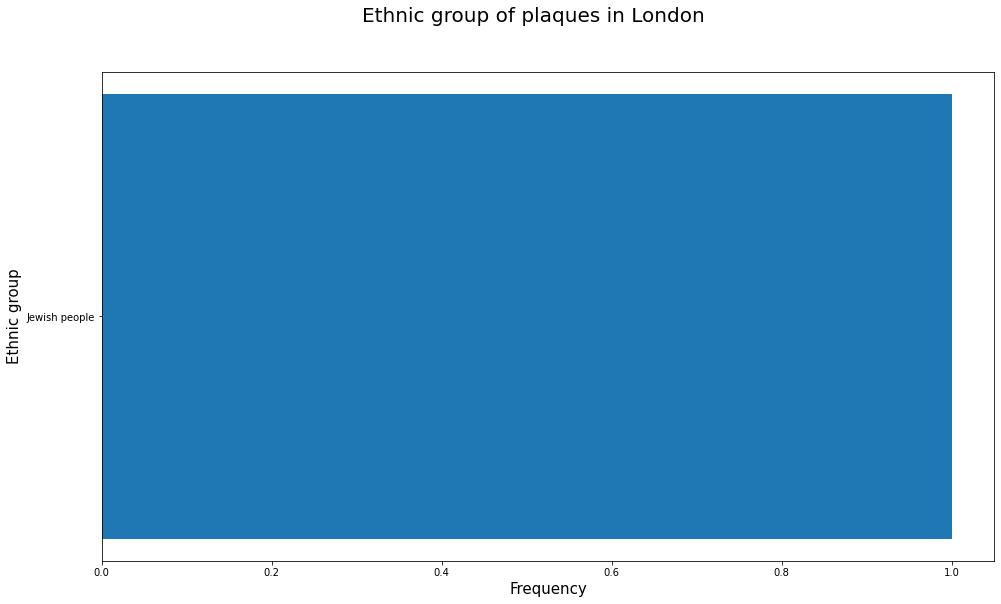

In [24]:
y_pos = list(range(len(res_dict)))
plt.rcParams["figure.figsize"] = (16,9)
fig = plt.figure()
plt.barh(y_pos, res_dict.values())
plt.yticks(y_pos, res_dict.keys())

fig.suptitle('Ethnic group of plaques in London',  fontsize = 20)
plt.xlabel('Frequency', fontsize = 15)
plt.ylabel('Ethnic group',  fontsize = 15)

plt.show()
fig.savefig('Ethnic group horizontal bar chart')